<a href="https://colab.research.google.com/github/bacoco/deeplearning.fr/blob/main/eda_and_automl_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT your DATA to classify

In [45]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/pplonski/datasets-for-start/master/adult/data.csv",skipinitialspace=True,)

target = 'income'

##### library to import

In [46]:
import sys
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df[target], test_size=0.25)

# EDA - Exploratory Data Analysis


## SWEETVIZ

> https://github.com/fbdesignpro/sweetviz

> https://youtu.be/UR_OK8vBpeY




In [48]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import sweetviz as sv

my_report = sv.analyze(df)

# we generate html report
# Default arguments will generate to "SWEETVIZ_REPORT.html"
my_report.show_html() 

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



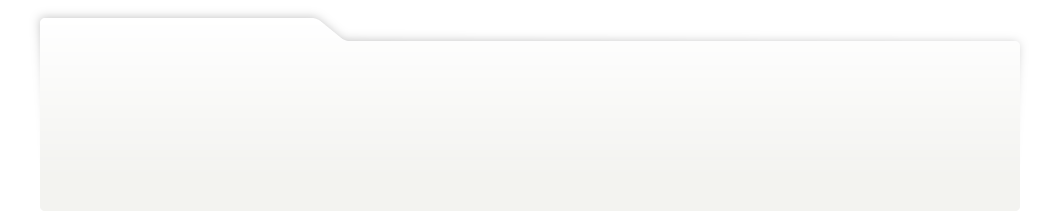
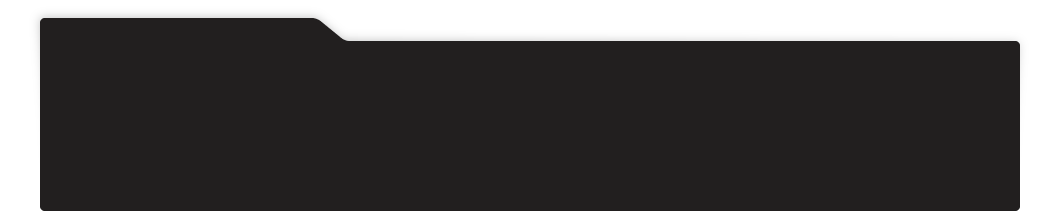
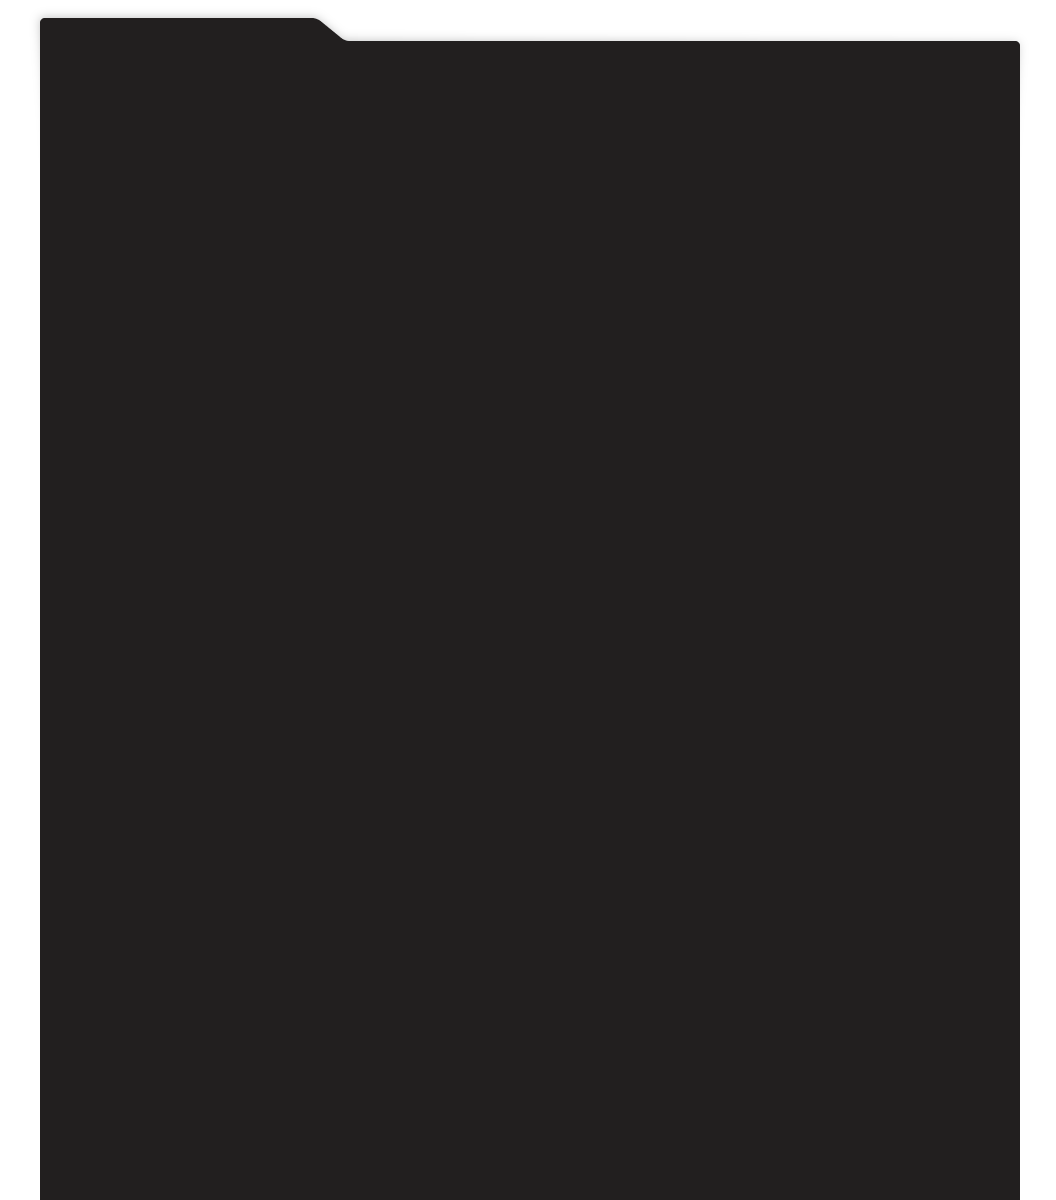
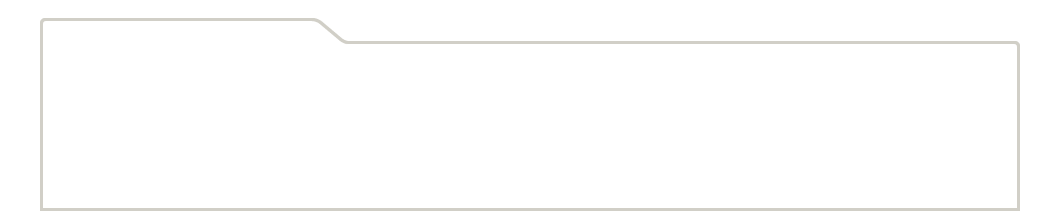
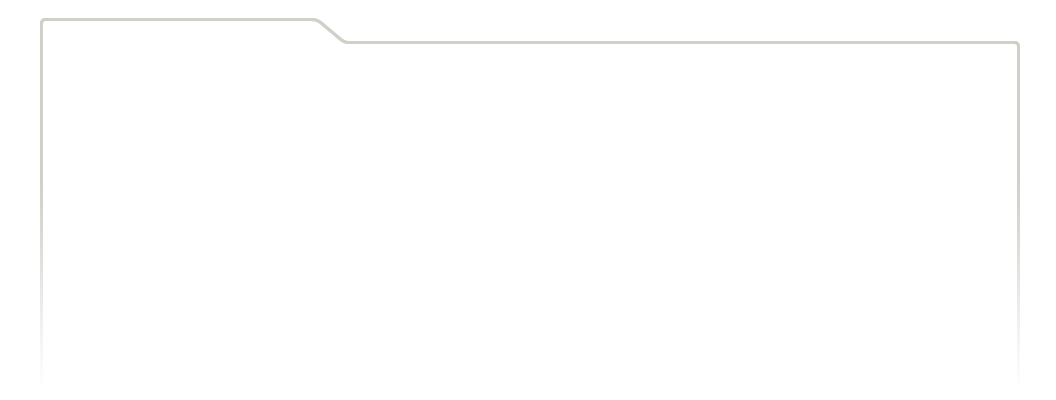
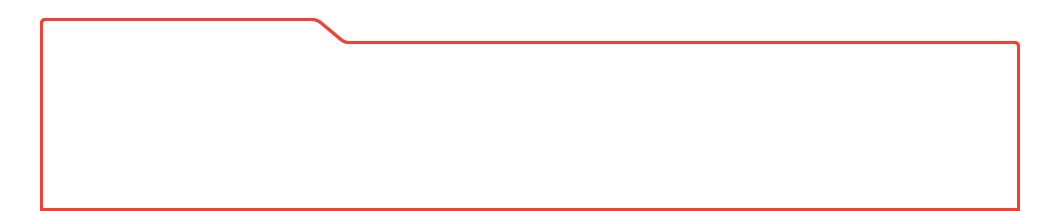
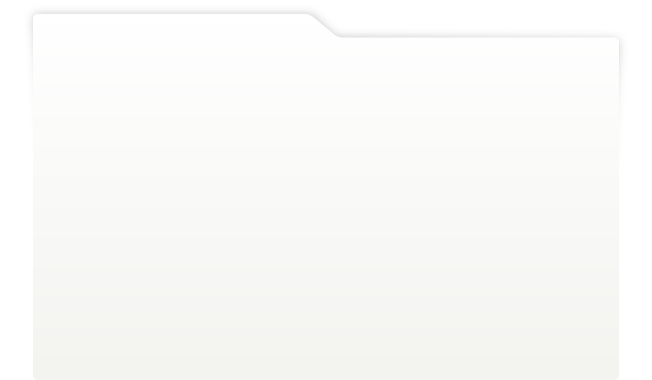
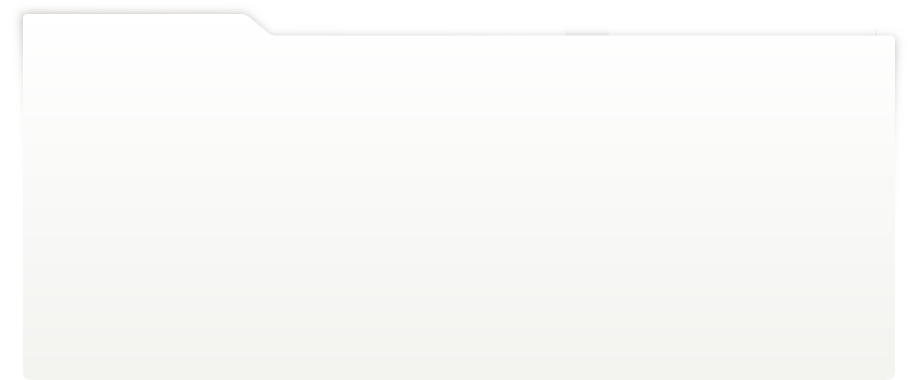
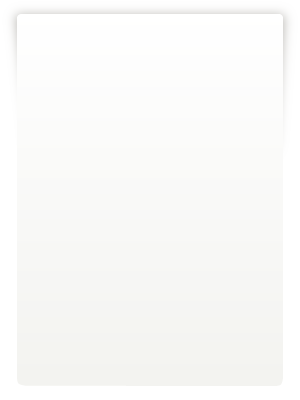
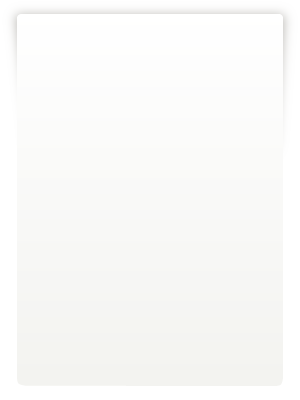
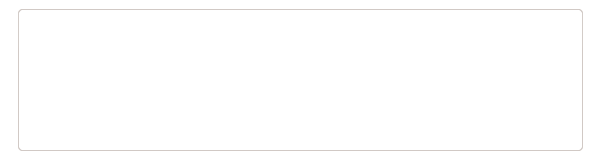
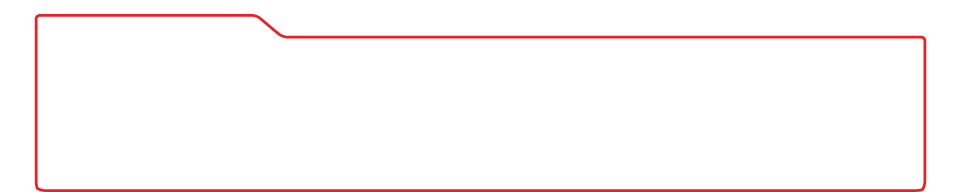
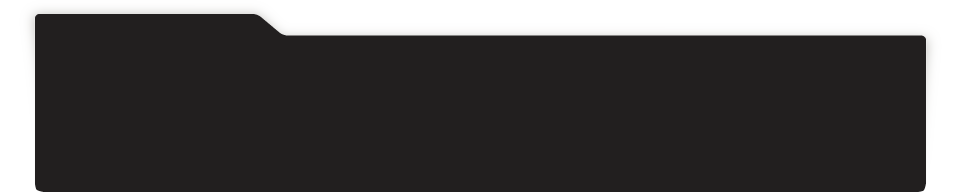
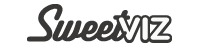
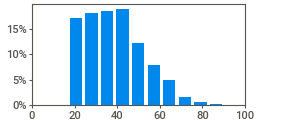
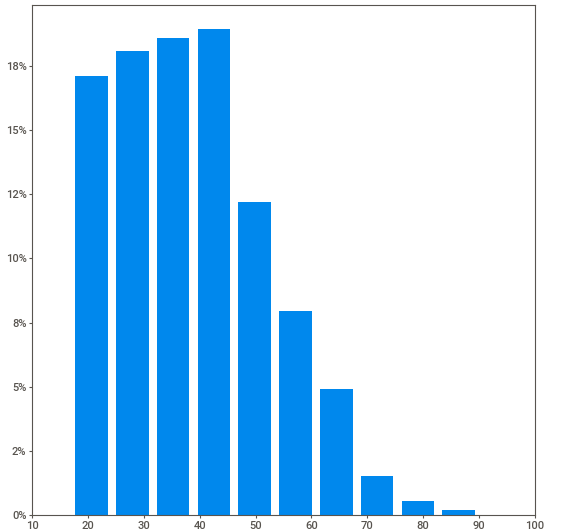
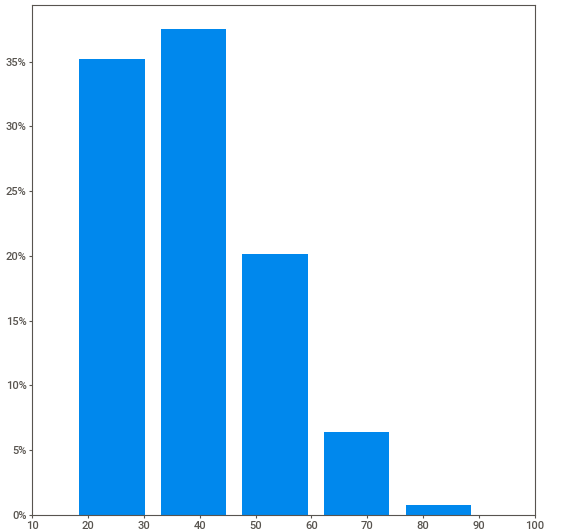
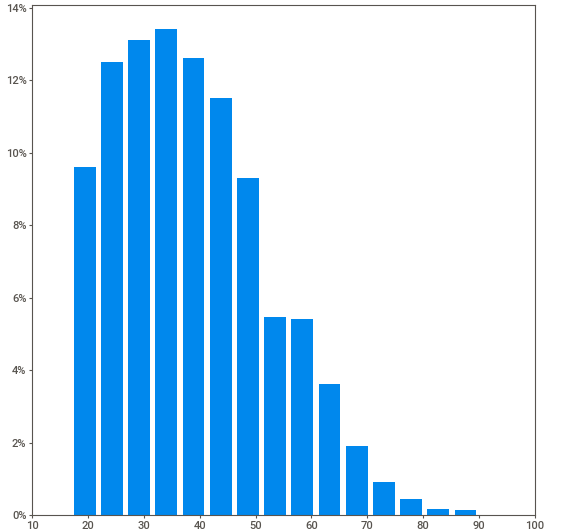
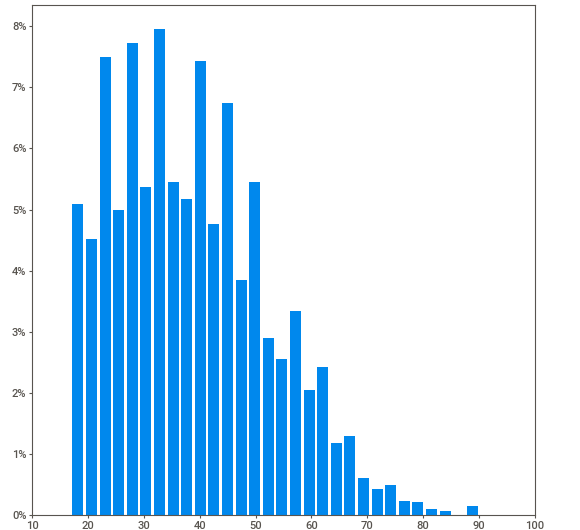
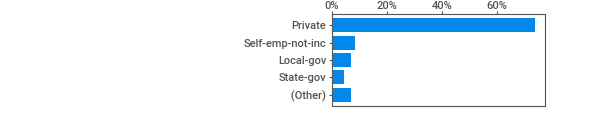
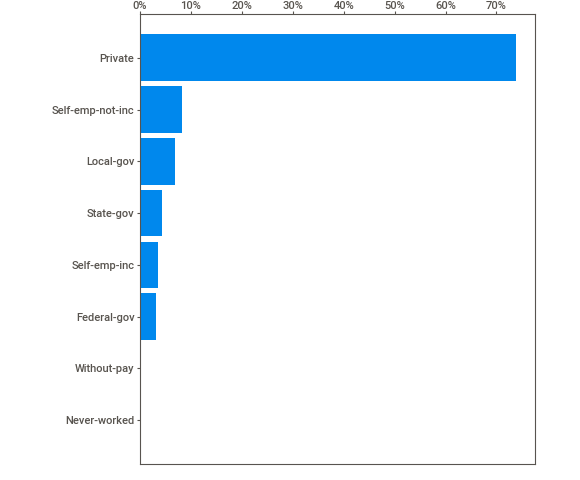
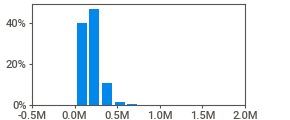
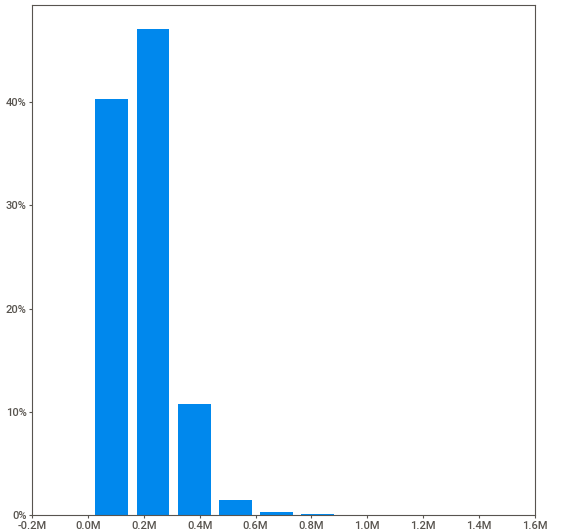
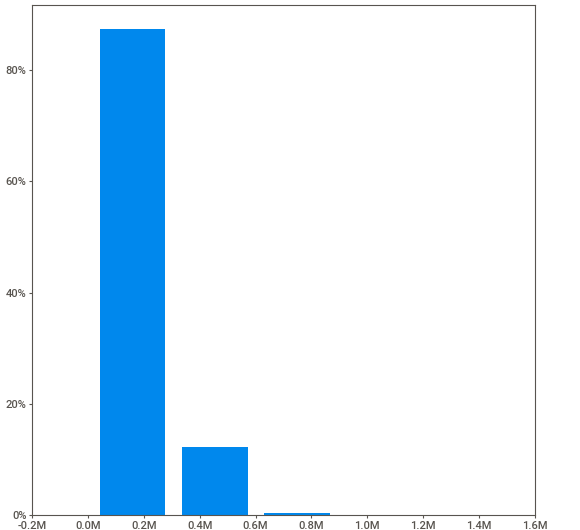
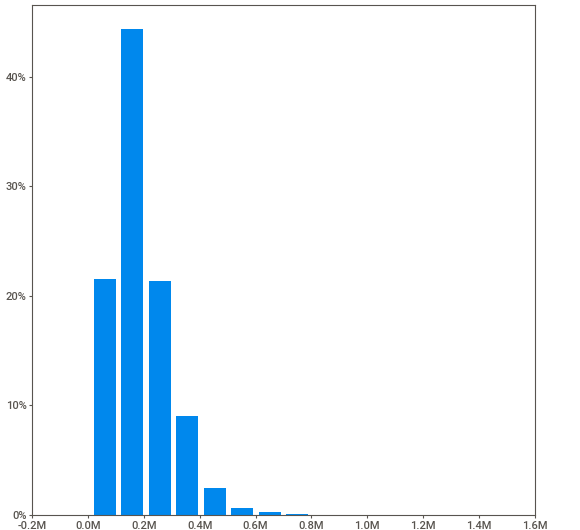
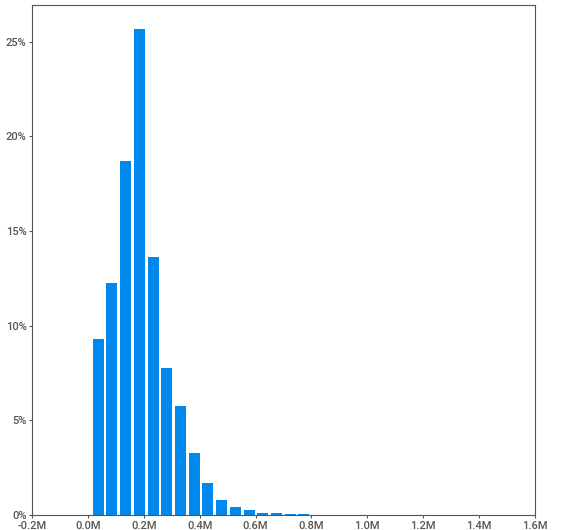
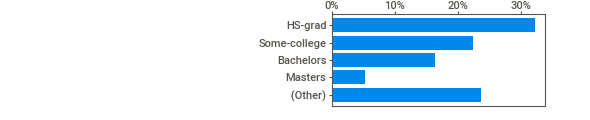
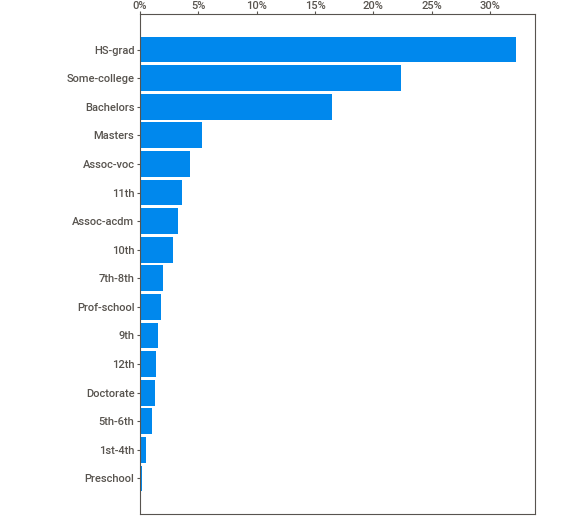
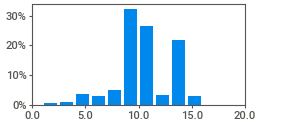
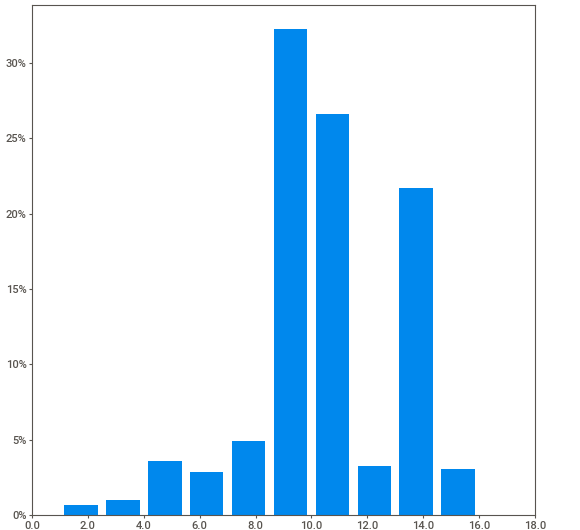
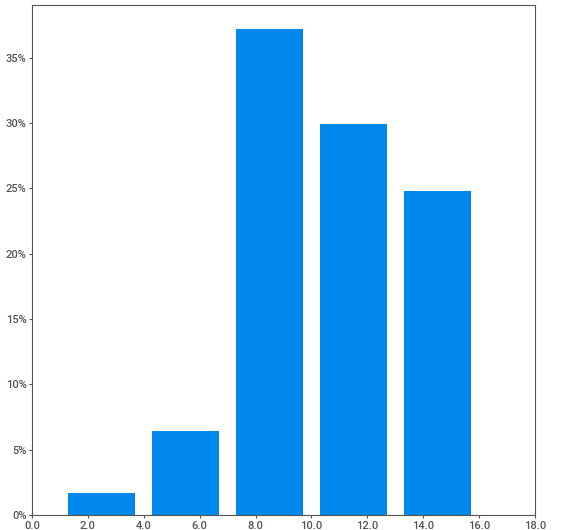
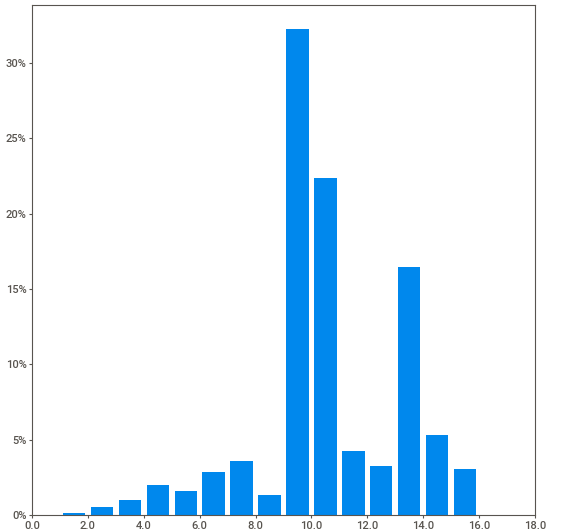
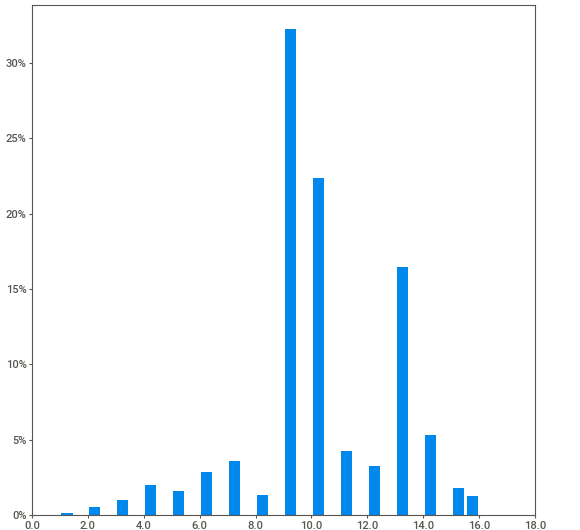
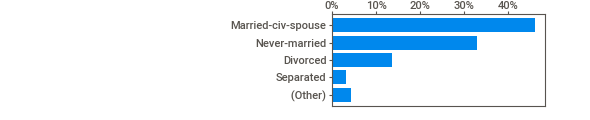
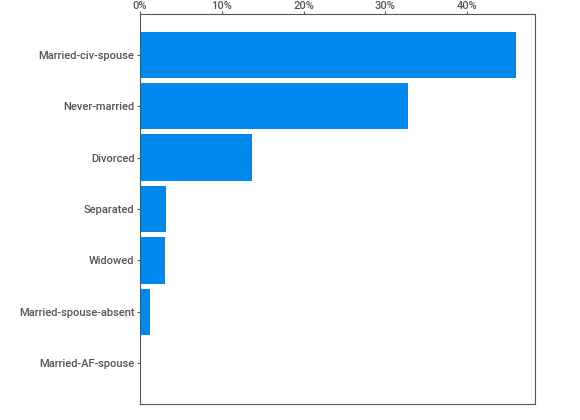
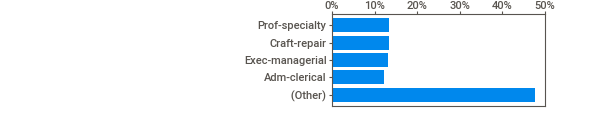
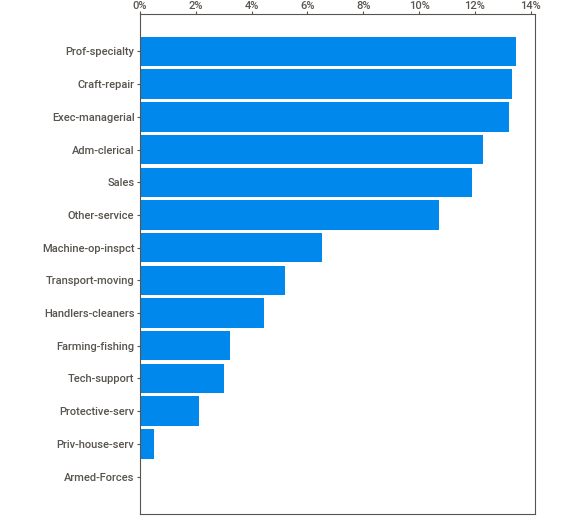
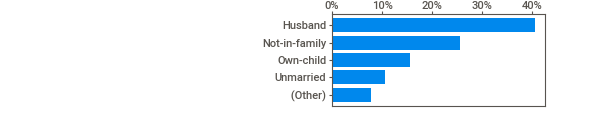
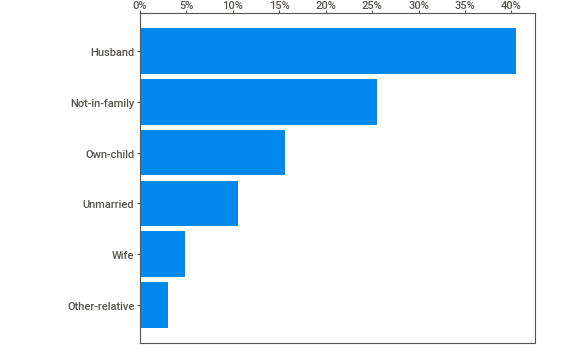
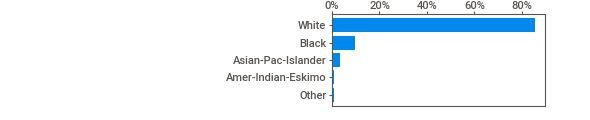
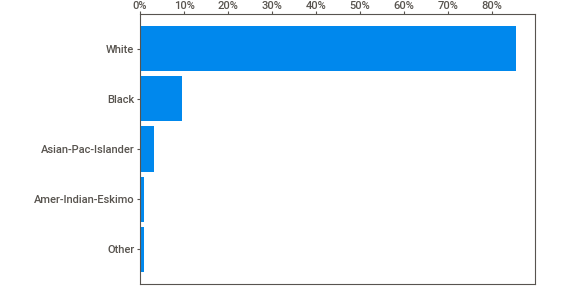
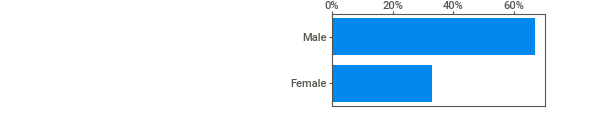
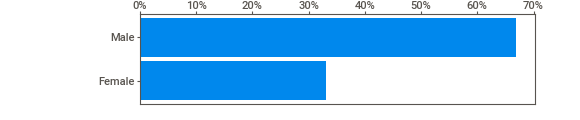
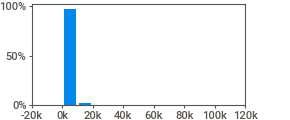
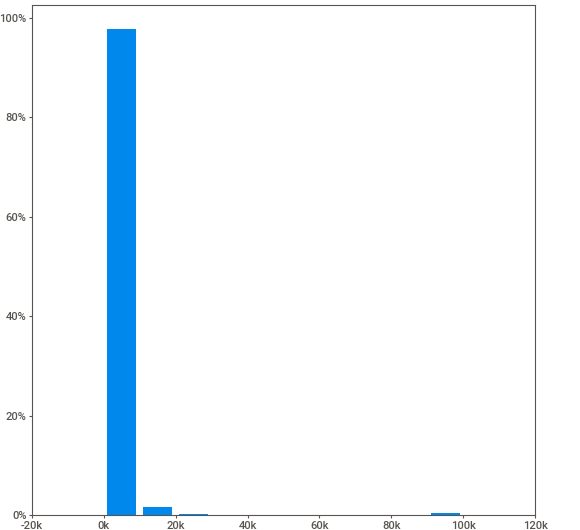
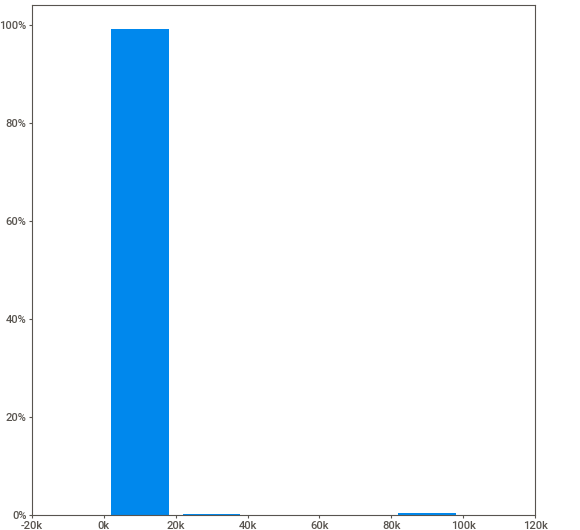
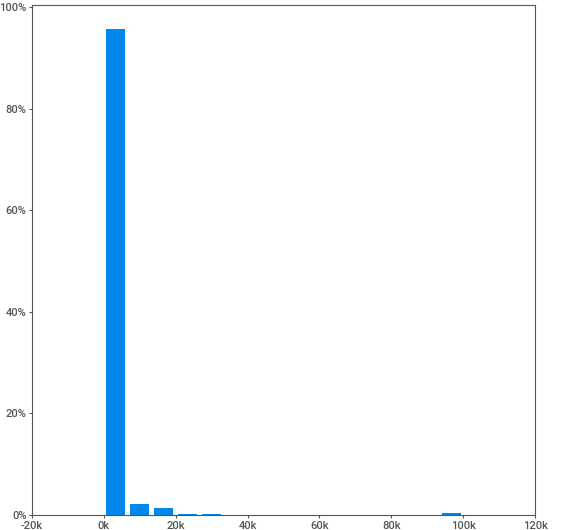
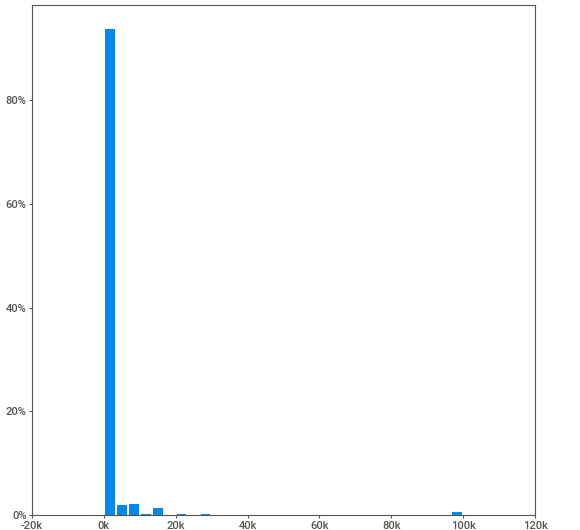
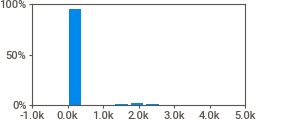
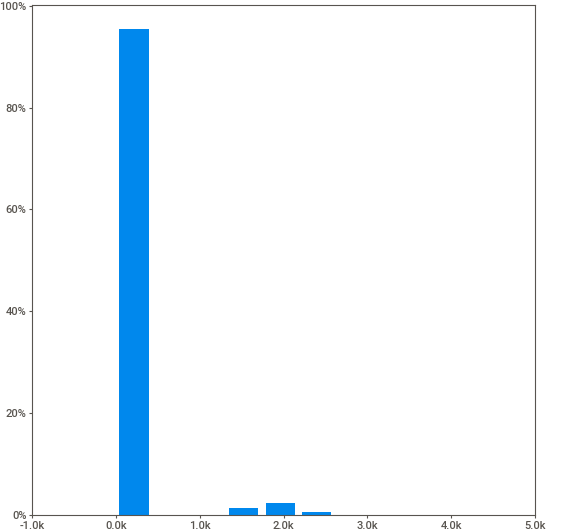
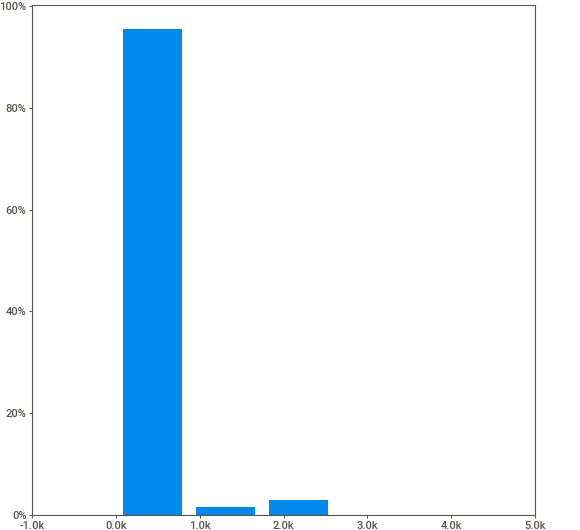
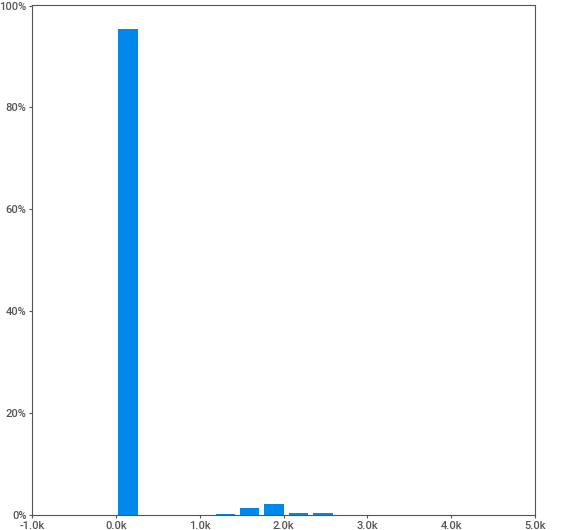
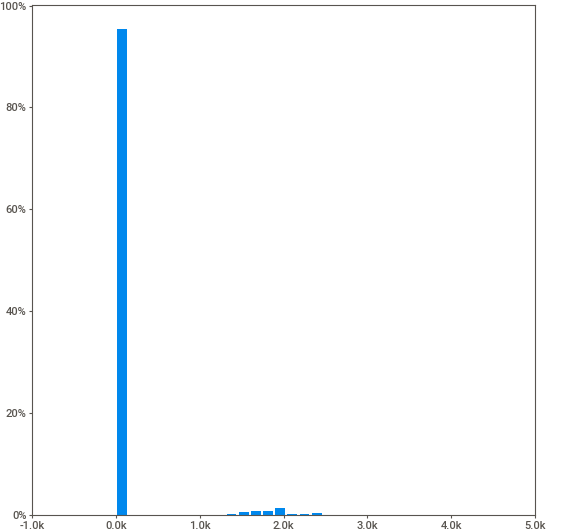
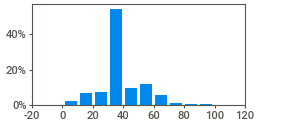
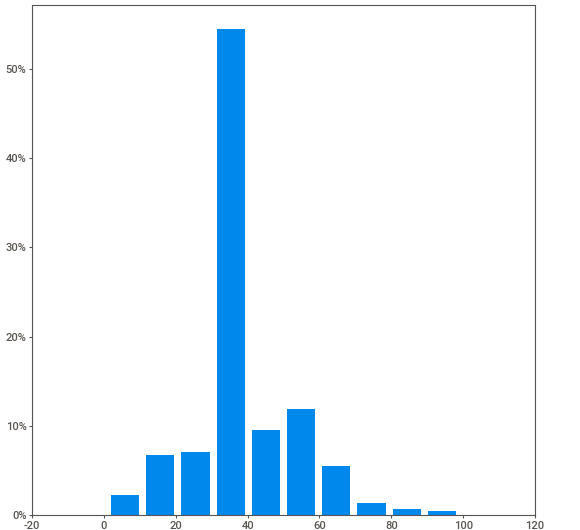
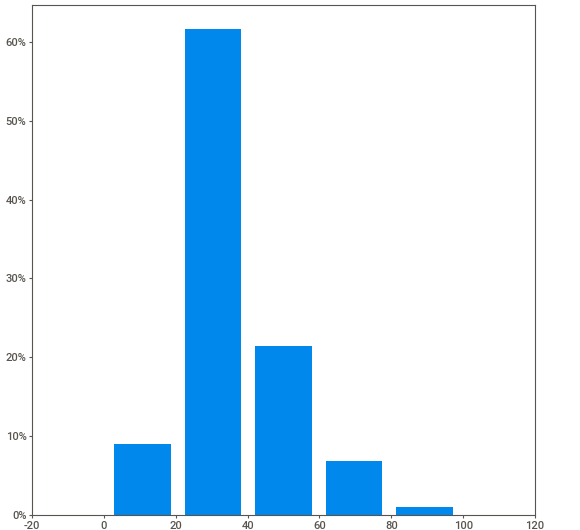
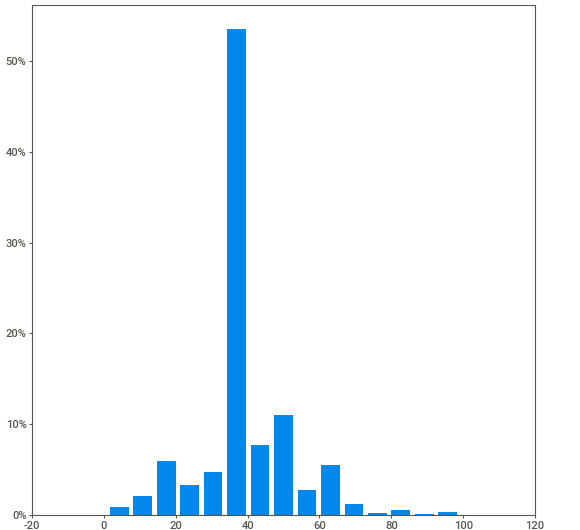
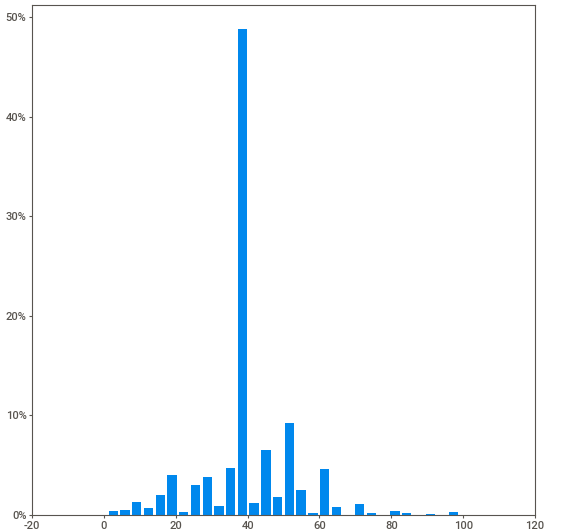
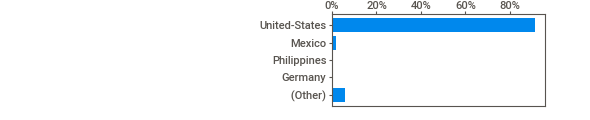
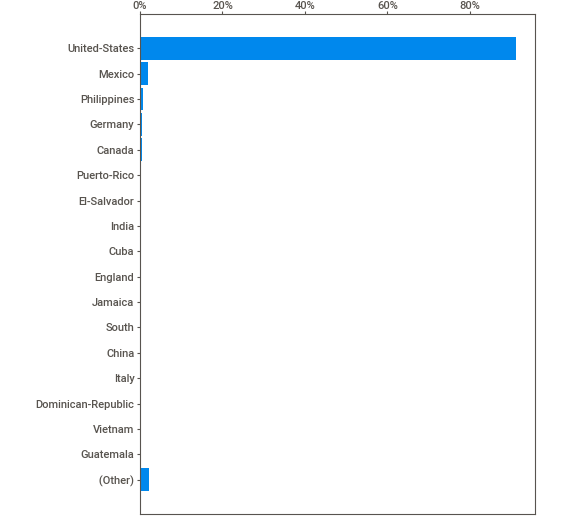
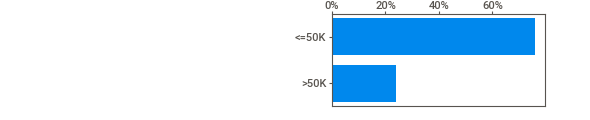
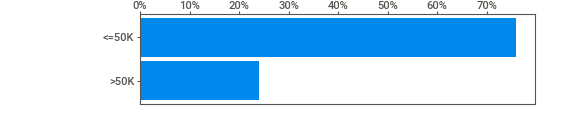
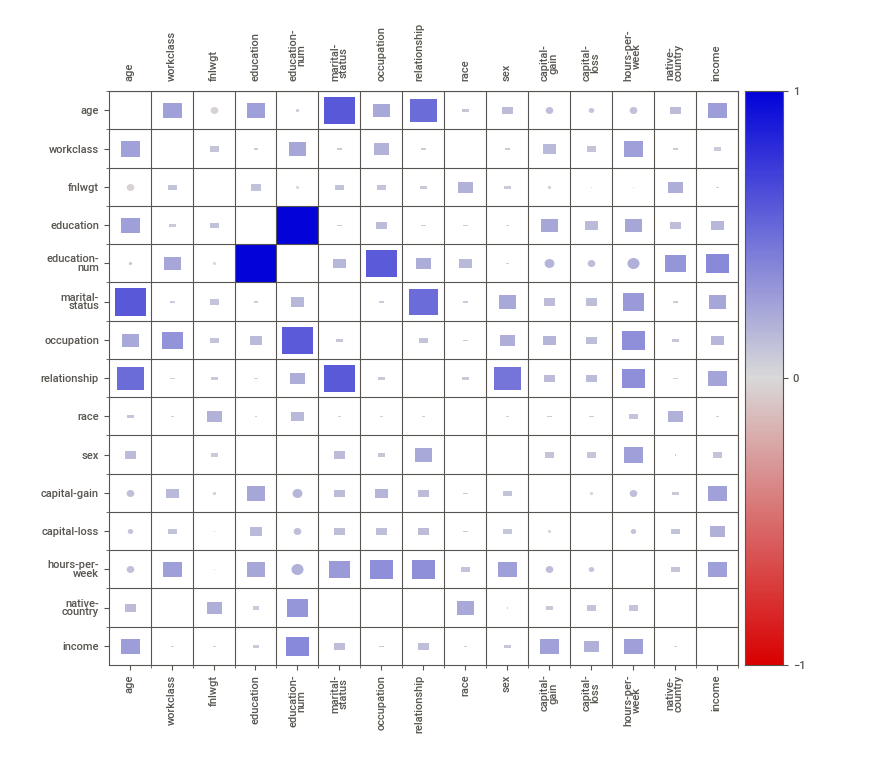
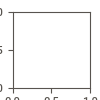

In [50]:
# we generate inline report
my_report.show_notebook()

In [51]:
#my_report_intra = sv.compare_intra(df, df["sex"] == "Male", ["Male", "Female"])
#my_report_intra.show_notebook()

## YDATA  PROFILING
https://github.com/ydataai/ydata-profiling

In [ ]:
!pip install ydata_profiling
#!pip install matplotlib==3.1.3

In [53]:
from ydata_profiling import ProfileReport

In [54]:
profile = ProfileReport(df, title="Profiling Report")

In [55]:
#To generate a HTML report file, save the ProfileReport to an object and use the to_file() function:
profile.to_file("ydata_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
#The HTML report can be directly embedded in a cell in a similar fashion:
profile.to_notebook_iframe()

# AUTOML

## MLJAR
### https://github.com/mljar/mljar-supervised


<img src="https://raw.githubusercontent.com/mljar/visual-identity/main/media/infograph.png" alt="Alternative text"/>

<img src="https://raw.githubusercontent.com/mljar/mljar-examples/master/media/AutoML_overview_mljar_v3.svg" alt="Alternative text"/>

<img src="https://raw.githubusercontent.com/mljar/visual-identity/main/media/mljar_modes.png" alt="Alternative text" />

In [ ]:
!pip install mljar-supervised

In [58]:
from supervised.automl import AutoML
#automl = AutoML(mode="Perform",results_path="AutoML_classifier")
automl = AutoML(mode="Explain",results_path="AutoML_classifier")
automl.fit(X_train, y_train)

Linear algorithm was disabled.
This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.


In [59]:
y_predicted = automl.predict(X_test)
y_predicted

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.8866232649551652

In [61]:
pd.read_csv('/content/AutoML_classifier/leaderboard.csv')

name      model_type metric_type  \
0                 1_Default_LightGBM        LightGBM     logloss   
1                  2_Default_Xgboost         Xgboost     logloss   
2                 3_Default_CatBoost        CatBoost     logloss   
3             5_Default_RandomForest   Random Forest     logloss   
4                         9_LightGBM        LightGBM     logloss   
5                          5_Xgboost         Xgboost     logloss   
6                        13_CatBoost        CatBoost     logloss   
7                    17_RandomForest   Random Forest     logloss   
8                        10_LightGBM        LightGBM     logloss   
9                          6_Xgboost         Xgboost     logloss   
10                       14_CatBoost        CatBoost     logloss   
11                   18_RandomForest   Random Forest     logloss   
12                  22_NeuralNetwork  Neural Network     logloss   
13                       11_LightGBM        LightGBM     logloss   
14                         7_Xgboost         Xgboost     logloss   
15                       15_CatBoost        CatBoost     logloss   
16                   19_RandomForest   Random Forest     logloss   
17                       12_LightGBM        LightGBM     logloss   
18                         8_Xgboost         Xgboost     logloss   
19                       16_CatBoost        CatBoost     logloss   
20                   20_RandomForest   Random Forest     logloss   
21                  24_NeuralNetwork  Neural Network     logloss   
22         9_LightGBM_GoldenFeatures        LightGBM     logloss   
23  2_Default_Xgboost_GoldenFeatures         Xgboost     logloss   
24        15_CatBoost_GoldenFeatures        CatBoost     logloss   
25          9_LightGBM_RandomFeature        LightGBM     logloss   
26                       25_LightGBM        LightGBM     logloss   
27                        26_Xgboost         Xgboost     logloss   
28                       27_CatBoost        CatBoost     logloss   
29        28_LightGBM_GoldenFeatures        LightGBM     logloss   
30                       29_CatBoost        CatBoost     logloss   
31                       30_CatBoost        CatBoost     logloss   
32         31_Xgboost_GoldenFeatures         Xgboost     logloss   
33                   32_RandomForest   Random Forest     logloss   
34                   33_RandomForest   Random Forest     logloss   
35                   34_RandomForest   Random Forest     logloss   
36                  35_NeuralNetwork  Neural Network     logloss   
37                  36_NeuralNetwork  Neural Network     logloss   
38                       37_LightGBM        LightGBM     logloss   
39                       38_CatBoost        CatBoost     logloss   
40                        39_Xgboost         Xgboost     logloss   
41                        40_Xgboost         Xgboost     logloss   
42                        41_Xgboost         Xgboost     logloss   
43                        42_Xgboost         Xgboost     logloss   
44                       43_LightGBM        LightGBM     logloss   
45                       44_CatBoost        CatBoost     logloss   
46                   45_RandomForest   Random Forest     logloss   
47                   46_RandomForest   Random Forest     logloss   
48                   47_RandomForest   Random Forest     logloss   
49                   48_RandomForest   Random Forest     logloss   
50                          Ensemble        Ensemble     logloss   

    metric_value  train_time  single_prediction_time  
0       0.282685       58.56                  0.0432  
1       0.280653       25.12                  0.0746  
2       0.281722       83.67                  0.0315  
3       0.342735       32.23                  0.0994  
4       0.279921       57.60                  0.0428  
5       0.284422       24.58                  0.0431  
6       0.282471      141.61                  0.0299  
7       0.341803       32.52                  0.1105  


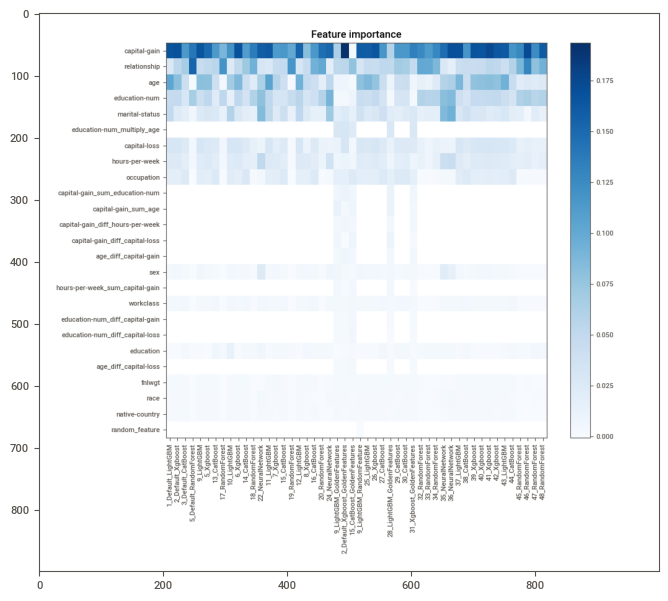

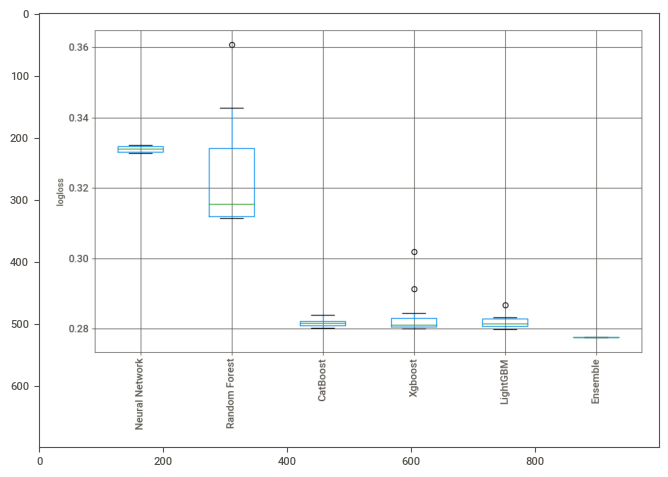

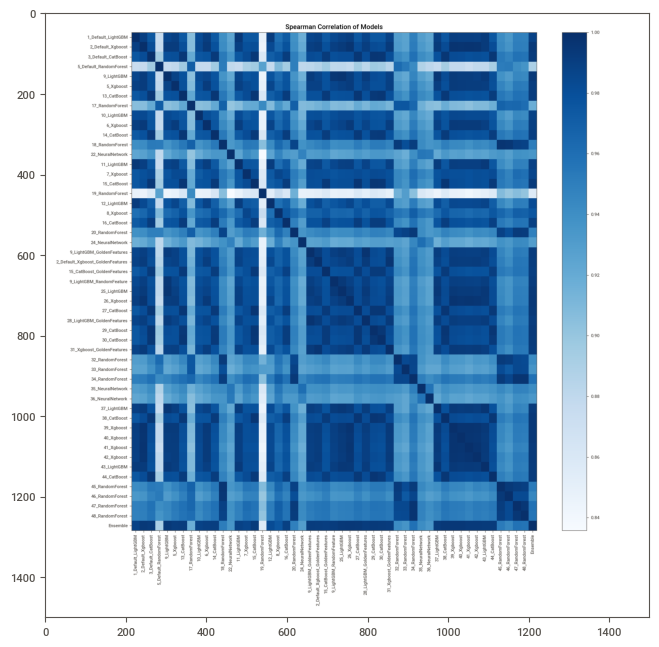

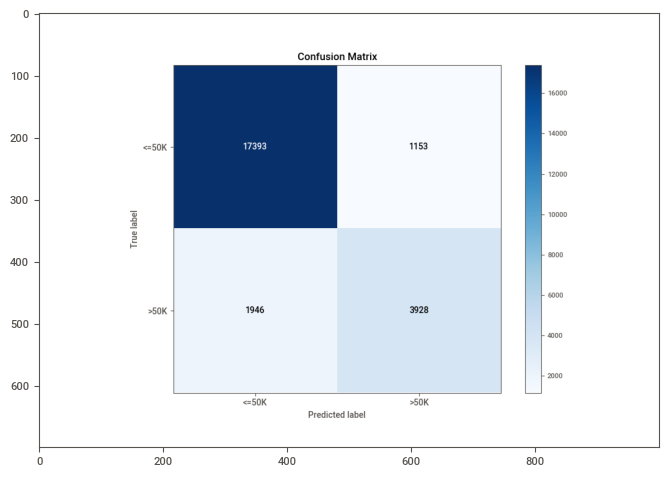

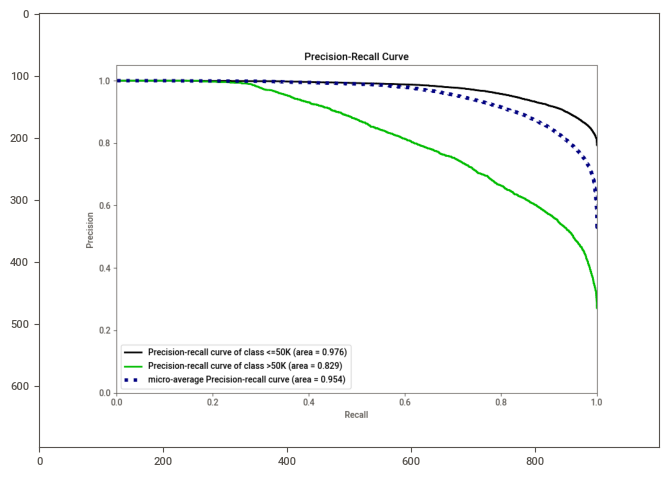

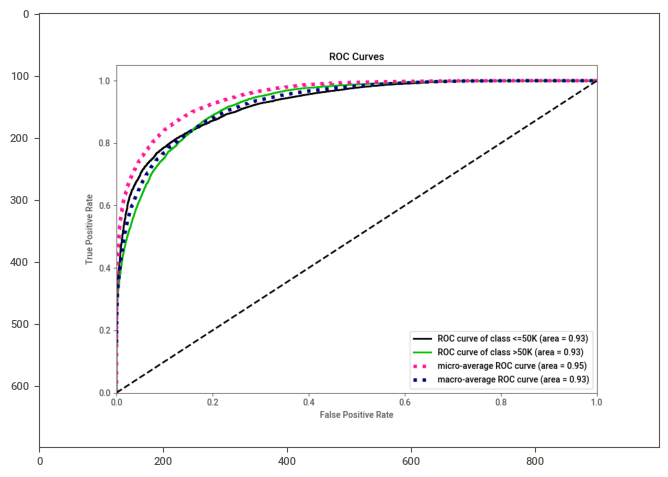

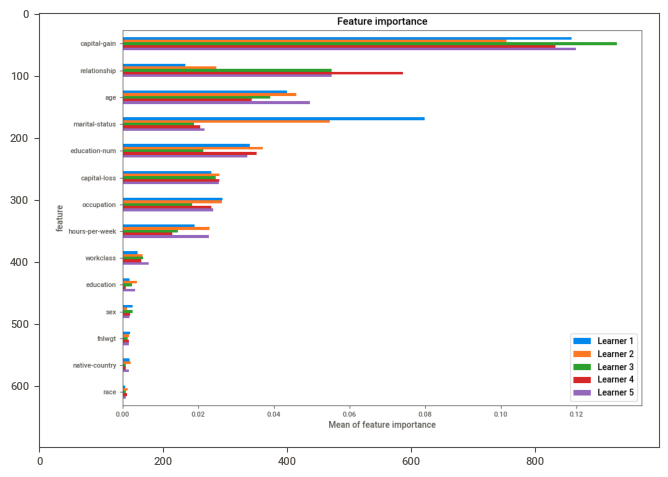

In [65]:
import imageio

def show_image(file):
  im=imageio.imread(file)
  plt.figure(figsize=(8,8))
  plt.imshow(im)
  plt.show()

show_image('/content/AutoML_classifier/features_heatmap.png')
show_image('/content/AutoML_classifier/ldb_performance_boxplot.png')
show_image('/content/AutoML_classifier/correlation_heatmap.png')
show_image('/content/AutoML_classifier/Ensemble/confusion_matrix.png')
show_image('/content/AutoML_classifier/Ensemble/precision_recall_curve.png')
show_image('/content/AutoML_classifier/Ensemble/roc_curve.png')
show_image('/content/AutoML_classifier/38_CatBoost/permutation_importance.png')



# PYCARET
### https://pycaret.gitbook.io/docs/

In [71]:
#!pip uninstall  --yes scikit-learn
#!pip install -U scikit-learn==0.23.2
#!pip install --use-deprecated=legacy-resolver pycaret[full]
#!pip install pycaret[full]

In [72]:
#from pycaret.classification import *
#s = setup(df, target = target)

In [73]:
#best = compare_models()

In [74]:
#print(best)
#plot_model(best)

In [75]:
#evaluate_model(best)

## LAZYPREDICT
https://lazypredict.readthedocs.io/en/latest/

In [1]:
#!pip install lazypredict[full]

In [2]:
#from lazypredict.Supervised import LazyClassifier

#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)

#models

# Yellowbrick: Machine Learning Visualization

https://www.scikit-yb.org/en/latest/index.html